In [1291]:
import pandas as pd
import numpy as np
import seaborn as sns


In [1292]:
#loading data
df = pd.read_csv("YourCabs_training.csv")

In [1293]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [1294]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [1295]:
df.Car_Cancellation.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

In [1296]:
len(df[df.Car_Cancellation==1])*100/ len(df),  len(df[df.Car_Cancellation==0])/ len(df)*100

(7.211438834012571, 92.78856116598743)

<AxesSubplot: xlabel='Car_Cancellation', ylabel='count'>

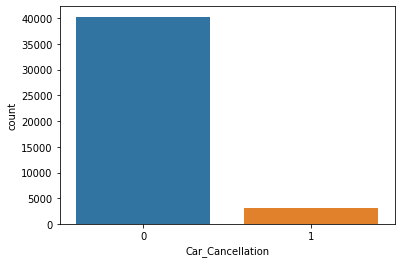

In [1297]:
sns.countplot(x= df.Car_Cancellation)

### Note: We can clearly see a class imbalance in this dataset, with 1 being 7.21% and 0 being 92.78%


##  Null value treatment

In [1298]:
#checking percentage of null values in columns
df.isnull().sum()/len(df)*100


id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

#### NOTE: package_id,from_city_id,to_city_id,to_date have more than 40% of missing values


In [1299]:
#checking percentage of null values in columns
df.T.isnull().sum()/len(df.T)*100

0        21.052632
1        21.052632
2        21.052632
3        21.052632
4        21.052632
           ...    
43426    10.526316
43427    10.526316
43428    21.052632
43429    10.526316
43430    10.526316
Length: 43431, dtype: float64

In [1300]:
# removing the columns having greater than 20% missing values
df.drop(['package_id','from_city_id','to_city_id','booking_created','to_date'],axis = 1, inplace= True)


12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: vehicle_model_id, dtype: int64

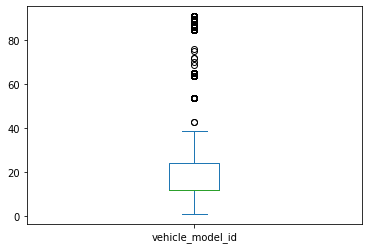

In [1301]:
#Checking the count of vehicle_model_id 
# since these are categorical variables currently we are avoiding outlier treatment 
df["vehicle_model_id"].plot(kind = 'box')
df["vehicle_model_id"].value_counts()

### since these are categorical variables currently we are avoiding outlier treatment 


In [1302]:
# removing all kinds of error with null value
df['to_lat'] = pd.to_numeric(df['to_lat'],errors='coerce')
df['to_long'] = pd.to_numeric(df['to_long'],errors='coerce')
df['from_lat'] = pd.to_numeric(df['from_lat'],errors='coerce')
df['from_long'] = pd.to_numeric(df['from_long'],errors='coerce')
df['to_area_id'] = pd.to_numeric(df['to_area_id'],errors='coerce')
df['from_area_id'] = pd.to_numeric(df['from_area_id'],errors='coerce')


In [1303]:
df['to_lat']=df['to_lat'].fillna(df['to_lat'].mean())
df['to_long']= df['to_long'].fillna(df['to_long'].mean())
df['from_lat']= df['from_lat'].fillna(df['from_lat'].mean())
df['from_long']= df['from_long'].fillna(df['from_long'].mean())
df['from_area_id']= df['from_area_id'].fillna(df['from_area_id'].mode()[0])
df['to_area_id']= df['to_area_id'].fillna(df['to_area_id'].mode()[0])

## Feature Engineering


In [1304]:
df.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [1305]:
#removing the columns which may not be contributing to the cancellation of cabs
df.drop(['id','user_id'],axis = 1, inplace= True)
len(df)

43431

In [1306]:
df['from_date']=pd.to_datetime(df["from_date"])


In [1307]:
df['from_year']= df['from_date'].apply(lambda x:x.year)
df['from_month']= df['from_date'].apply(lambda x:x.month)
df['fromdate']= df['from_date'].apply(lambda x:x.day)
df['from_day']= df['from_date'].apply(lambda x:x.day_name())
df['from_hour']= df['from_date'].apply(lambda x:x.hour)
df.drop(['from_date'], inplace = True, axis=1)

In [1308]:
# As longitude, latitude already consists the neccessary information for location
# keeping area id and city id will be redundant
# hence we are removing these columns
df.drop(['from_area_id','to_area_id'],axis=1,inplace =True)


##  Encoding

In [1309]:
# we are removing all the NA rows for now
#df.dropna(inplace = True)

In [1310]:

from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df['from_day']= label_encoder.fit_transform(df['from_day'])

df

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_year,from_month,fromdate,from_day,from_hour
0,28,2,0,0,12.924150,77.672290,12.927320,77.635750,0,2013,1,1,5,2
1,12,2,0,0,12.966910,77.749350,12.927680,77.626640,0,2013,1,1,5,9
2,12,2,0,0,12.937222,77.626915,13.047926,77.597766,0,2013,1,1,5,3
3,12,2,0,0,12.989990,77.553320,12.971430,77.639140,0,2013,1,1,5,5
4,12,2,0,0,12.845653,77.677925,12.954340,77.600720,0,2013,1,1,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,12,2,1,0,13.030640,77.649100,12.952780,77.590880,0,2013,11,24,3,18
43427,12,2,1,0,13.199560,77.706880,13.017436,77.644580,0,2013,11,26,5,1
43428,12,3,0,0,13.075570,77.559040,13.026648,77.640595,0,2013,11,24,3,18
43429,87,2,0,0,12.968970,77.594560,12.938230,77.622890,0,2013,11,24,3,16


In [1311]:
#vehicle_model_id is categorical variable, so we are using one hot encoding for each model


df =pd.get_dummies(df,columns=['vehicle_model_id',],drop_first=True)

In [1312]:
#finally data looks like this
df

,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_year,from_month,...,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91
0,2,0,0,12.924150,77.672290,12.927320,77.635750,0,2013,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,12.966910,77.749350,12.927680,77.626640,0,2013,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,12.937222,77.626915,13.047926,77.597766,0,2013,1,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,12.989990,77.553320,12.971430,77.639140,0,2013,1,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,12.845653,77.677925,12.954340,77.600720,0,2013,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1,0,13.030640,77.649100,12.952780,77.590880,0,2013,11,...,0,0,0,0,0,0,0,0,0,0
43427,2,1,0,13.199560,77.706880,13.017436,77.644580,0,2013,11,...,0,0,0,0,0,0,0,0,0,0
43428,3,0,0,13.075570,77.559040,13.026648,77.640595,0,2013,11,...,0,0,0,0,0,0,0,0,0,0
43429,2,0,0,12.968970,77.594560,12.938230,77.622890,0,2013,11,...,0,0,0,0,0,0,1,0,0,0


## Traget-Feature & Train-Test Split

In [1313]:
# dividing features and target as X and Y respectively
Y = df['Car_Cancellation']
X = df.drop(['Car_Cancellation'],axis=1)

In [1314]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X.columns

Index(['travel_type_id', 'online_booking', 'mobile_site_booking', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'from_year', 'from_month', 'fromdate',
       'from_day', 'from_hour', 'vehicle_model_id_10', 'vehicle_model_id_12',
       'vehicle_model_id_13', 'vehicle_model_id_14', 'vehicle_model_id_17',
       'vehicle_model_id_23', 'vehicle_model_id_24', 'vehicle_model_id_28',
       'vehicle_model_id_30', 'vehicle_model_id_36', 'vehicle_model_id_39',
       'vehicle_model_id_43', 'vehicle_model_id_54', 'vehicle_model_id_64',
       'vehicle_model_id_65', 'vehicle_model_id_69', 'vehicle_model_id_70',
       'vehicle_model_id_72', 'vehicle_model_id_75', 'vehicle_model_id_76',
       'vehicle_model_id_85', 'vehicle_model_id_86', 'vehicle_model_id_87',
       'vehicle_model_id_89', 'vehicle_model_id_90', 'vehicle_model_id_91'],
      dtype='object')

In [1315]:
#splitting data into train-test 
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.75, random_state=23)

In [1316]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### As this dataset has class imbalance, accuracy isn't a good indicator for the performance of them model, hence will be checking F1-Score + Accuracy for this dataset

## Logistic Regression

In [1317]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=10000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [1318]:
y_train_pred1 = model1.predict(x_train)
y_test_pred1= model1.predict(x_test)

In [1319]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

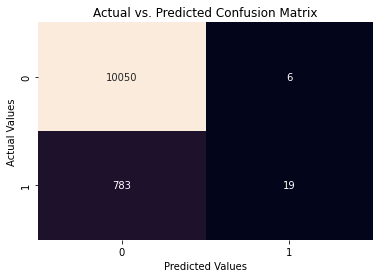

In [1320]:
conf_mat = create_conf_mat(y_test, y_test_pred1)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [1321]:
# using cross validation score
from sklearn.model_selection import cross_val_score
#score1 = cross_val_score(model1,X,Y,cv=10,scoring='accuracy')


In [1322]:
score1.mean()

0.9187880766604855

In [1323]:
len(y_train),len(y_train_pred1)

(32573, 32573)

In [1324]:
print("Training accuracy",model1.score(x_train,y_train)*100,'%')
print("Testing accuracy",model1.score(x_test,y_test)*100,'%')

Training accuracy 92.90209682866177 %
Testing accuracy 92.73346841038865 %


In [1325]:
print(classification_report(y_train,y_train_pred1))
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     30243
           1       0.62      0.02      0.04      2330

    accuracy                           0.93     32573
   macro avg       0.78      0.51      0.50     32573
weighted avg       0.91      0.93      0.90     32573

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10056
           1       0.76      0.02      0.05       802

    accuracy                           0.93     10858
   macro avg       0.84      0.51      0.50     10858
weighted avg       0.92      0.93      0.89     10858



#### Train f1-score (1) = 5%               Test f1-score(1) = 4%
#### Train Accuracy = 92%                Test Accuracy = 92%

## Random Forest Classifier

In [1326]:
from sklearn.ensemble import RandomForestClassifier
# using cross validation score
model2 = RandomForestClassifier(random_state =7)
model2.fit(x_train,y_train)


RandomForestClassifier(max_depth=15, n_estimators=10, random_state=7)

In [1327]:
y_train_pred2 = model2.predict(x_train)
y_test_pred2= model2.predict(x_test)

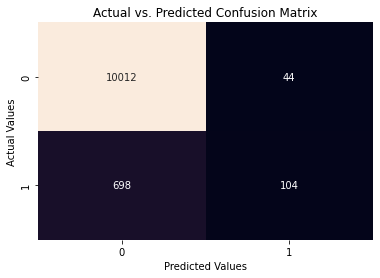

In [1329]:
print("Training accuracy",model2.score(x_train,y_train)*100,'%')
print("Testing accuracy",model2.score(x_test,y_test)*100,'%')

Training accuracy 95.71424185675252 %
Testing accuracy 93.16632897402837 %


In [1330]:
print(classification_report(y_train,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30243
           1       0.98      0.41      0.58      2330

    accuracy                           0.96     32573
   macro avg       0.97      0.71      0.78     32573
weighted avg       0.96      0.96      0.95     32573

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10056
           1       0.70      0.13      0.22       802

    accuracy                           0.93     10858
   macro avg       0.82      0.56      0.59     10858
weighted avg       0.92      0.93      0.91     10858



#### Train f1-score(1) = 58%              Test f1-score(1) = 22%
#### Train Accuracy = 95.7%          Test Accuracy = 93.1%

## Adaboost Classifier


In [1331]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=10)
model3.fit(x_train, y_train)
y_test_pred3=model3.predict(x_test)
y_train_pred3 = model3.predict(x_train)



In [1332]:
print("Training accuracy",model3.score(x_train,y_train)*100,'%')
print("Testing accuracy",model3.score(x_test,y_test)*100,'%')

Training accuracy 92.95121726583366 %
Testing accuracy 92.86240559955793 %


In [1333]:
print(classification_report(y_train,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     30243
           1       0.53      0.13      0.21      2330

    accuracy                           0.93     32573
   macro avg       0.73      0.56      0.59     32573
weighted avg       0.91      0.93      0.91     32573

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10056
           1       0.57      0.14      0.22       802

    accuracy                           0.93     10858
   macro avg       0.75      0.56      0.59     10858
weighted avg       0.91      0.93      0.91     10858



#### Train f1-score(1) = 21%              Test f1-score(1) = 22%
#### Train Accuracy = 92.95%          Test Accuracy = 92.86%

### ADA-boost seems to be the best model as f1-score(1) for train and test seems to be close
### And the accuracy of Train and Test is almost equal.
### The 2nd Best model is Random forest, it has accuracy for Train, Test similar to ADA-boost, but the f1-score(1) for train, test have a huge difference i.e. 58% and 22%. Which signifies that model is overfitted.
### The least preferable model is logistic as we can se f1-score(1) is highly impacted for train and test data.
### So we are dropping logistic regression further in hyperparameter tuning.

# Hyperparameter Tuning

In [1334]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(40)
start = time.time()

param_dist = {
             'n_estimators': [20,40,80,100,120],
              'learning_rate':[0.5,1,1.5]
             }

cv_rf = GridSearchCV(model3,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'learning_rate': 1, 'n_estimators': 80}
Time taken in grid search: 80.04


In [1335]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=10, learning_rate=1, n_estimators=80)
model3.fit(x_train, y_train)
y_test_pred3=model3.predict(x_test)
y_train_pred3 = model3.predict(x_train)



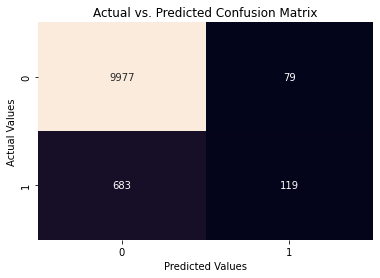

In [1336]:
conf_mat = create_conf_mat(y_test, y_test_pred3)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [1337]:
print("Training accuracy",model3.score(x_train,y_train)*100,'%')
print("Testing accuracy",model3.score(x_test,y_test)*100,'%')

Training accuracy 93.01875786694501 %
Testing accuracy 92.98213298950083 %


In [1338]:
print(classification_report(y_train,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     30243
           1       0.54      0.15      0.23      2330

    accuracy                           0.93     32573
   macro avg       0.74      0.57      0.60     32573
weighted avg       0.91      0.93      0.91     32573

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10056
           1       0.60      0.15      0.24       802

    accuracy                           0.93     10858
   macro avg       0.77      0.57      0.60     10858
weighted avg       0.91      0.93      0.91     10858



In [1357]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(40)
start = time.time()

param_dist = {'n_estimators':[10,15,20,25],
             'max_depth':[5,10,15,20],
             'bootstrap':[True,False],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(model2,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 20}
Time taken in grid search: 84.10


In [1379]:
from sklearn.ensemble import RandomForestClassifier
# using cross validation score
model2 = RandomForestClassifier(n_estimators  = 20,max_depth=20,random_state =7,bootstrap=False,criterion= 'entropy')
model2.fit(x_train,y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       n_estimators=20, random_state=7)

In [1380]:
y_train_pred2 = model2.predict(x_train)
y_test_pred2= model2.predict(x_test)

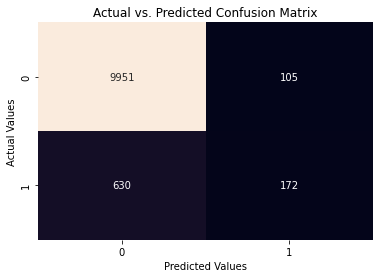

In [1381]:
conf_mat = create_conf_mat(y_test, y_test_pred2)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [1382]:
print("Training accuracy",model2.score(x_train,y_train)*100,'%')
print("Testing accuracy",model2.score(x_test,y_test)*100,'%')

Training accuracy 99.48423540969515 %
Testing accuracy 93.230797568613 %


In [1383]:
print(classification_report(y_train,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30243
           1       1.00      0.93      0.96      2330

    accuracy                           0.99     32573
   macro avg       1.00      0.96      0.98     32573
weighted avg       0.99      0.99      0.99     32573

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10056
           1       0.62      0.21      0.32       802

    accuracy                           0.93     10858
   macro avg       0.78      0.60      0.64     10858
weighted avg       0.92      0.93      0.92     10858



# Conclusion

### ADA-Boost gives f1-score(1) as 23%,24% for train,test respectively with hyperparameter tuning
### With 92.98% testing accuracy and 93.01% training accuracy

## 

### Random-Forest gives f1-score(1) as 96%,32% for train,test respectively with hyperparameter tuning
### With 99.48% testing accuracy and 93.23% training accuracy, which looks like an overfitted model

##

## Hence, we can conclude our best model for use would be ADA-Boost over here